In [2]:
import pandas as pd

In [ ]:
df = pd.read_csv('sales.csv')
df.head()

,Unnamed: 0,digital,TV,radio,newspaper,sales
0,1,345.15,156.0,37.8,69.2,22.1
1,2,66.75,46.0,39.3,45.1,10.4
2,3,25.80,18.3,45.9,69.3,9.3
3,4,227.25,145.1,41.3,58.5,18.5
4,5,271.20,165.2,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1199 non-null   int64  
 1   digital     1199 non-null   float64
 2   TV          1199 non-null   float64
 3   radio       1199 non-null   float64
 4   newspaper   1199 non-null   float64
 5   sales       1199 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 56.3 KB


In [5]:
df.describe()

,Unnamed: 0,digital,TV,radio,newspaper,sales
count,1199.000000,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,599.996664,135.472394,146.61985,23.240617,30.529942,14.005505
std,346.260032,135.730821,85.61047,14.820827,21.712507,5.202804
min,1.000000,0.300000,0.70000,0.000000,0.300000,1.600000
25%,300.500000,24.250000,73.40000,9.950000,12.800000,10.300000
50%,600.000000,64.650000,149.70000,22.500000,25.600000,12.900000
75%,899.500000,256.950000,218.50000,36.500000,45.100000,17.400000
max,1197.000000,444.600000,296.40000,49.600000,114.000000,27.000000


In [6]:
df.shape

(1199, 6)

In [7]:
df.isnull().sum()

Unnamed: 0    0
digital       0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
Corr = df.corr()
Corr

,digital,TV,radio,newspaper,sales
digital,1.000000,0.474256,0.041316,0.048023,0.380101
TV,0.474256,1.000000,0.055697,0.055579,0.781824
radio,0.041316,0.055697,1.000000,0.353096,0.576528
newspaper,0.048023,0.055579,0.353096,1.000000,0.227039
sales,0.380101,0.781824,0.576528,0.227039,1.000000


<Axes: >

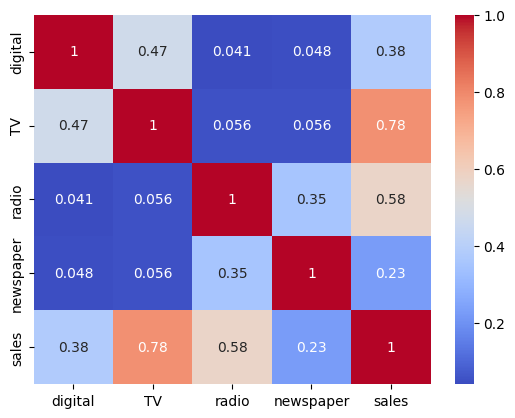

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(Corr, annot=True, cmap='coolwarm')

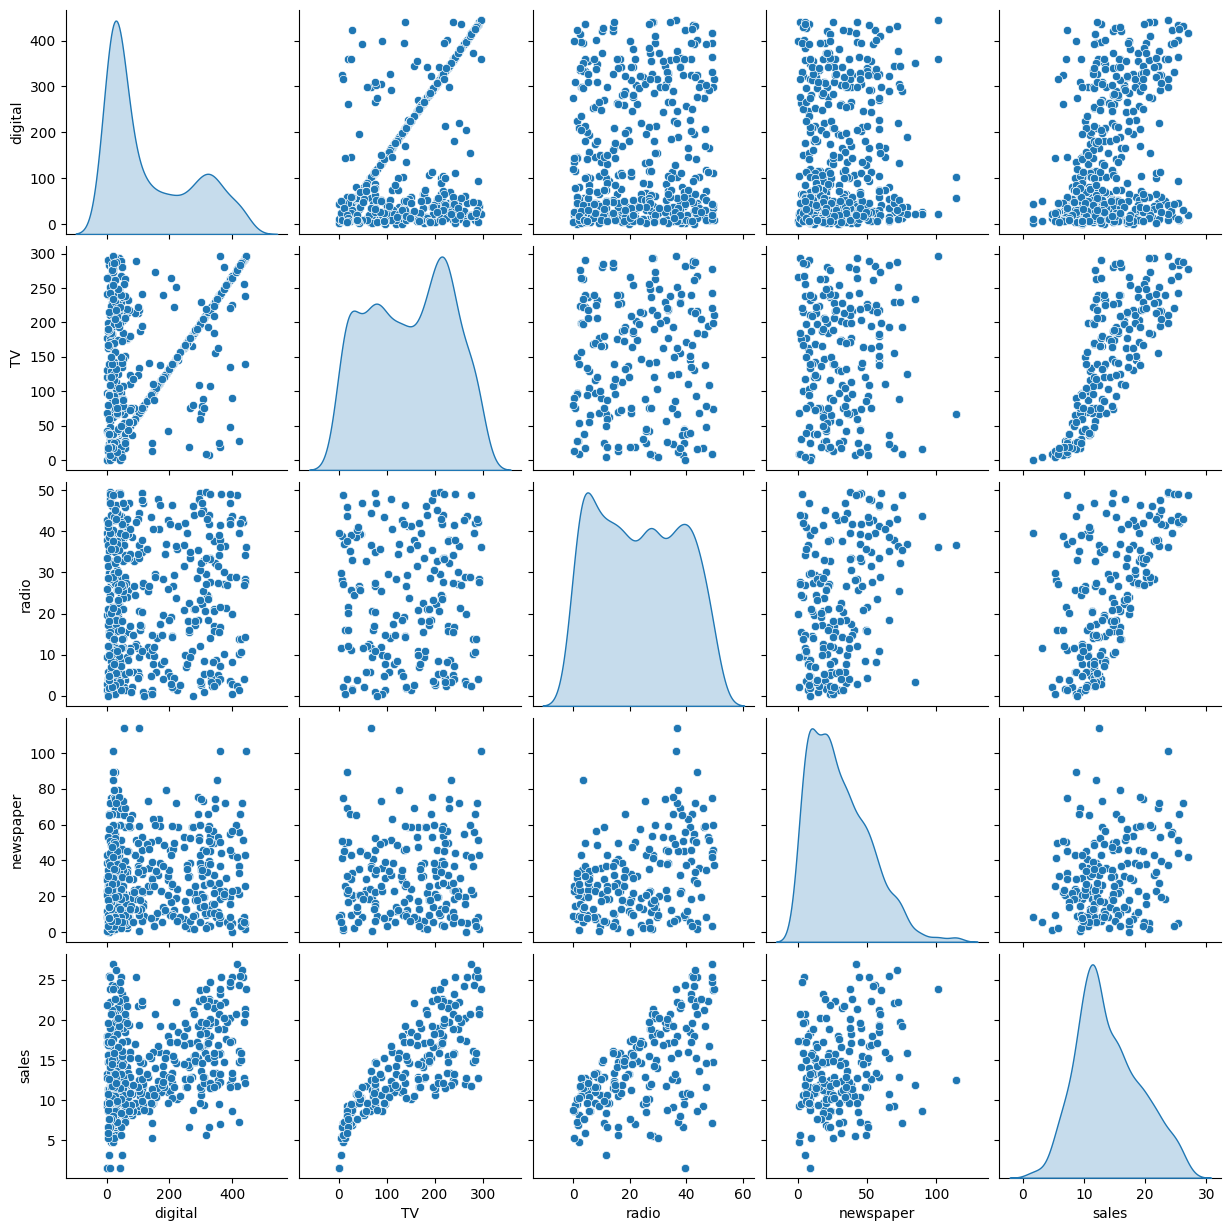

In [11]:
sns.pairplot(df, diag_kind='kde')

In [12]:
X = df.drop('sales',axis=1)
y = df['sales']

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled

array([[0.77616475, 0.52519445, 0.76209677, 0.60598065],
       [0.14956111, 0.15319581, 0.79233871, 0.39401935],
       [0.05739365, 0.05951978, 0.92540323, 0.60686016],
       ...,
       [0.01372946, 0.31619885, 0.09879032, 0.06860158],
       [0.01755571, 0.12681772, 0.07459677, 0.11873351],
       [0.01372946, 0.31619885, 0.09879032, 0.06860158]])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(959, 4) (240, 4) (959,) (240,)


In [17]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model = Sequential()
 
model.add(Dense(4,input_dim=4,activation='relu')) 
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse',metrics=['mse'])

history = model.fit(X_train,y_train,epochs=35, validation_data=(X_test, y_test))

c:\Users\7XIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 218.0260 - mse: 218.0260 - val_loss: 226.0158 - val_mse: 226.0158
Epoch 2/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 210.7592 - mse: 210.7592 - val_loss: 186.1148 - val_mse: 186.1148
Epoch 3/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 158.5976 - mse: 158.5976 - val_loss: 155.5364 - val_mse: 155.5364
Epoch 4/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 153.3178 - mse: 153.3178 - val_loss: 142.3353 - val_mse: 142.3353
Epoch 5/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 135.9359 - mse: 135.9359 - val_loss: 134.9002 - val_mse: 134.9002
Epoch 6/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 124.7791 - mse: 124.7791 - val_loss: 128.4116 - val_mse: 128.4116
Epoch 7/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 122.9727 - mse: 122.9727 - val_loss: 73.7030 - val_mse: 73.7030
Epoch 8/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56.1787 - mse: 56.1787 - val_loss: 33.1560 - val_mse: 33.1560
Epoch 9/35
30

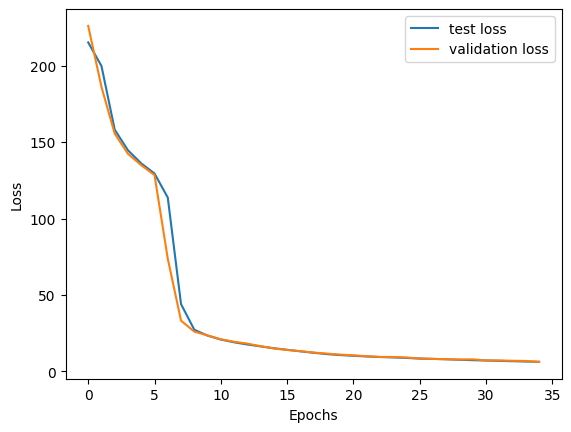

In [19]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['test loss', 'validation loss'],loc='upper right')
plt.show()

In [20]:
predictions = model.predict(X_test)
table = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
table.head()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


,Actual,Predicted
983,26.2,25.420107
753,19.0,18.604576
435,12.8,19.008352
937,20.8,20.900955
295,16.9,16.881451


<Axes: xlabel='Actual', ylabel='Predicted'>

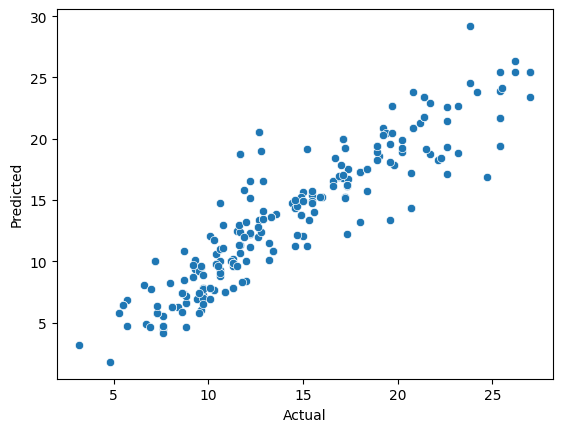

In [21]:
sns.scatterplot(x='Actual', y='Predicted', data=table)

In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [23]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, pred_train)))
print(np.sqrt(mean_squared_error(y_train, pred_train)))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2.4622118402127726
2.4622118402127726


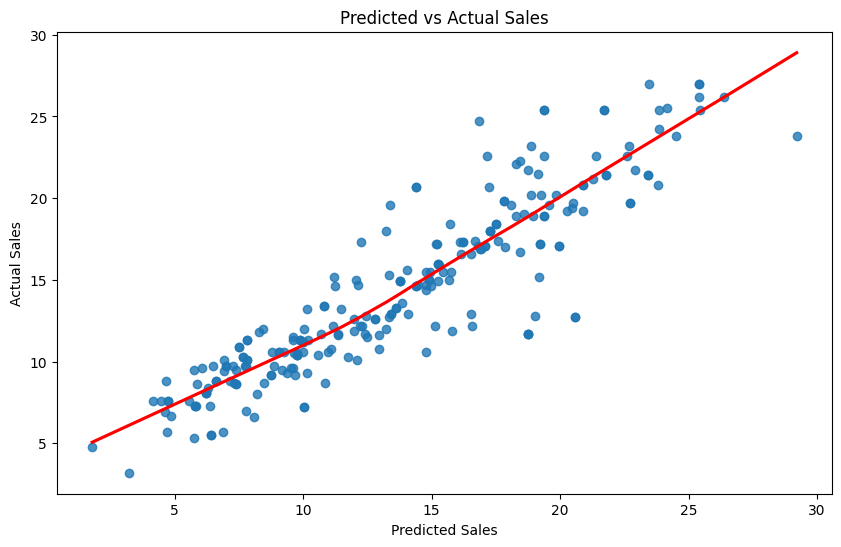

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(x=pred_test, y=y_test, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Sales')
plt.ylabel('Actual Sales')
plt.title('Predicted vs Actual Sales')
plt.show()